# Experiment 02
## *Implement Feed forward neural network with three hidden layers for classification on CIFAR-10 dataset.*

In [2]:
# Import necessary libraries
import tensorflow as tf
from keras import models, layers
from keras.datasets import cifar10              # CIFAR-10 image dataset (10 categories of 32x32 color images)
from keras.utils import to_categorical          # For one-hot encoding the labels

# Load the CIFAR-10 dataset (50k training, 10k test images)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize image pixel values from range [0, 255] to [0, 1] for better training performance
X_train, X_test = X_train / 255.0, X_test / 255.0

# Print the shape of datasets
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
# Convert class labels to one-hot encoded vectors (e.g., 3 -> [0 0 0 1 0 0 0 0 0 0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print the shape after one-hot encoding
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## Model Definition

In [5]:
# ------------------ Model Definition ------------------

# Define a Sequential neural network model
model = models.Sequential()

# Flatten 3D image input (32x32x3) into 1D vector for fully connected layers
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# Add fully connected layers (Dense) with ReLU activation for non-linearity
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output layer with 10 neurons (one per class) and softmax activation to output probabilities
model.add(layers.Dense(10, activation='softmax'))

## Model Compilation

In [6]:
# ------------------ Model Compilation ------------------

# Compile the model with:
# - 'adam' optimizer (efficient and commonly used)
# - 'categorical_crossentropy' as loss function (for multi-class classification)
# - 'accuracy' as the performance metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the architecture of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [7]:
# ------------------ Training ------------------

# Train the model for 15 epochs, using validation data to monitor overfitting
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate model performance on test set
score = model.evaluate(X_test, y_test)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.2742 - loss: 1.9883 - val_accuracy: 0.3618 - val_loss: 1.7335
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.3881 - loss: 1.6964 - val_accuracy: 0.4290 - val_loss: 1.5997
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4171 - loss: 1.6214 - val_accuracy: 0.4436 - val_loss: 1.5485
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.4468 - loss: 1.5439 - val_accuracy: 0.4572 - val_loss: 1.5265
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4623 - loss: 1.5033 - val_accuracy: 0.4588 - val_loss: 1.5078
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.4741 - loss: 1.4644 - val_accuracy: 0.4674 - val_loss: 1.4954
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.4872 - loss: 1.4274 - val_accuracy: 0.4620 - val_loss: 1.5028
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4932 -

## Visualization

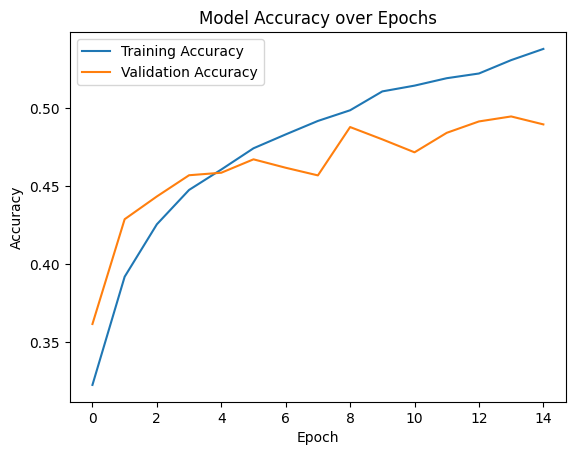

In [8]:
# ------------------ Visualization ------------------

# Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()